In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

  Using cached numpy-2.2.6-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade matplotlib


  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import cv2

In [6]:
# Define paths using absolute paths
# Change directory accordingly
TRAIN_DIR = "/Users/hachitran/Desktop/1. School/1. FAU/Courses/2025/Fall 2025/CAP 4630/archive/clouds_train"
TEST_DIR = "/Users/hachitran/Desktop/1. School/1. FAU/Courses/2025/Fall 2025/CAP 4630/archive/clouds_test"

In [7]:
# Get all class folder names
train_path = Path(TRAIN_DIR)
class_names = sorted([d.name for d in train_path.iterdir() if d.is_dir()])

# Define image size (adjust if needed)
IMG_WIDTH = 224
IMG_HEIGHT = 224

# Lists to store images and labels
images = []
labels = []

# Load images from each class folder
for class_idx, class_name in enumerate(class_names):
    class_folder = train_path / class_name
    
    # Get all .jpg files in this class folder
    image_files = list(class_folder.glob("*.jpg"))
    
    print(f"\nLoading {class_name}...")
    
    for img_file in image_files:
        # Read image with OpenCV
        img = cv2.imread(str(img_file))
        
        if img is not None:
            # Convert BGR to RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Resize to consistent size
            img_resized = cv2.resize(img_rgb, (IMG_WIDTH, IMG_HEIGHT))
            
            images.append(img_resized)
            labels.append(class_idx)

# Convert to numpy arrays
images_array = np.array(images)
labels_array = np.array(labels)

print(f"\n✓ Loaded {len(images_array)} images total")
print(f"✓ Image shape: {images_array[0].shape}")
print(f"✓ Labels shape: {labels_array.shape}")



Loading cirriform clouds...

Loading clear sky...

Loading cumulonimbus clouds...

Loading cumulus clouds...

Loading high cumuliform clouds...

Loading stratiform clouds...

Loading stratocumulus clouds...

✓ Loaded 474 images total
✓ Image shape: (224, 224, 3)
✓ Labels shape: (474,)


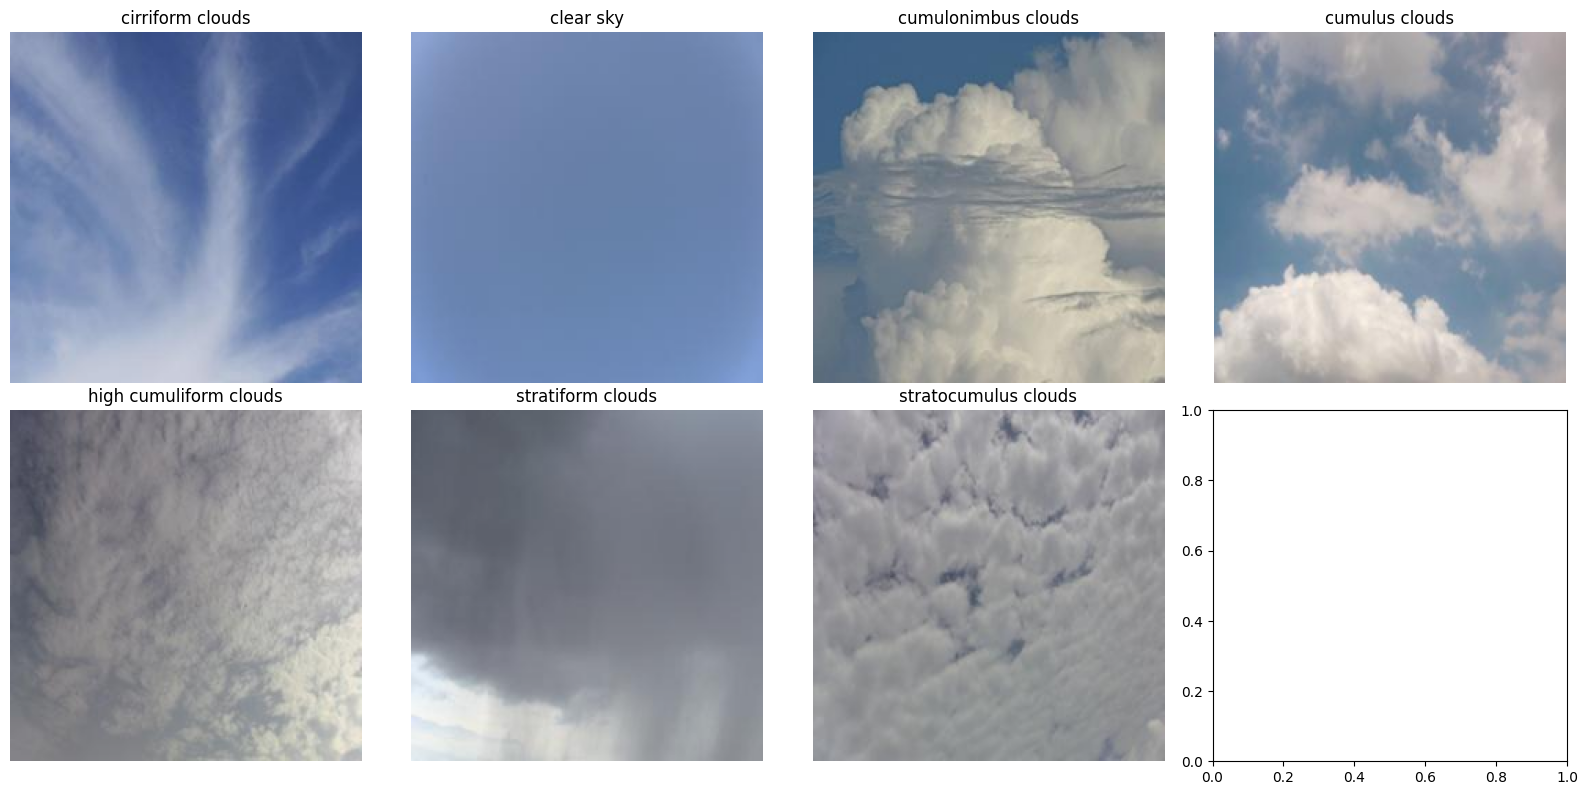

In [8]:
# Show random sample images from each class
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

# Set random seed for reproducibility
np.random.seed(42)

sample_idx = 0
for class_idx, class_name in enumerate(class_names):
    # Find random image of this class
    indices = np.where(labels_array == class_idx)[0]
    if len(indices) > 0:
        # Pick a random image from this class
        img_idx = np.random.choice(indices)
        axes[sample_idx].imshow(images_array[img_idx])
        axes[sample_idx].set_title(f"{class_name}")
        axes[sample_idx].axis('off')
        sample_idx += 1

plt.tight_layout()
plt.show()


In [9]:
# Normalize pixel values to [0, 1]
images_normalized = images_array / 255.0

print(f"Pixel values range: [{images_normalized.min():.2f}, {images_normalized.max():.2f}]")


Pixel values range: [0.00, 1.00]


In [14]:
# Split data into training and validation sets - RYAN done by 11/16/2025
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    images_normalized, labels_array, test_size=0.2, random_state=42, stratify=labels_array
)

print(f"Training set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Total: {len(X_train) + len(X_val)} images")
print(f"\nTraining set shape: {X_train.shape}")
print(f"\nValidation set shape: {X_val.shape}")

# Check class distribution in both sets
print("\n")
print("Training set:")
for class_idx, class_name in enumerate(class_names):
    count = np.sum(y_train == class_idx)
    percentage = (count / len(y_train)) * 100
    print(f"  {class_name}: {count} ({percentage:.1f}%)")

print("\nValidation set:")
for class_idx, class_name in enumerate(class_names):
    count = np.sum(y_val == class_idx)
    percentage = (count / len(y_val)) * 100
    print(f"  {class_name}: {count} ({percentage:.1f}%)")

Training set: 379 images
Validation set: 95 images
Total: 474 images

Training set shape: (379, 224, 224, 3)

Validation set shape: (95, 224, 224, 3)


Training set:
  cirriform clouds: 53 (14.0%)
  clear sky: 48 (12.7%)
  cumulonimbus clouds: 11 (2.9%)
  cumulus clouds: 73 (19.3%)
  high cumuliform clouds: 106 (28.0%)
  stratiform clouds: 39 (10.3%)
  stratocumulus clouds: 49 (12.9%)

Validation set:
  cirriform clouds: 13 (13.7%)
  clear sky: 12 (12.6%)
  cumulonimbus clouds: 3 (3.2%)
  cumulus clouds: 18 (18.9%)
  high cumuliform clouds: 27 (28.4%)
  stratiform clouds: 10 (10.5%)
  stratocumulus clouds: 12 (12.6%)


In [11]:
# Load and preprocess test data - RYAN done by 11/16/2025


In [ ]:
#Buildiing CNN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images_array, test_labels_array)
print(f"Test accuracy: {test_acc:.2f}")